<div id="toc_1" data-value="Inital code"></div>

# Scatterplot Animation using Matplotlib, day 2
   We will animate a scatterplot in today's tutorial.  
Lets get right into it.

### Import all the necessary modules.

In [1]:
import numpy as np
np.random.seed(2021)

import matplotlib.pyplot as plt
import matplotlib.colors
plt.style.use('seaborn-whitegrid')

import matplotlib.animation as animation # for the animation

from IPython.display import HTML # To display the animation in jupter notebook

<div id="toc_2" data-value="Data Preparation"></div>

### Prepare some random data
The majority of data you will animate is either **Time Series** or data generated through some iterative process.  
So one axis/ dimension of your data should contain the time / iterative feature.  
**Lineplot example:**
<p><center>Price of an item (You can represent the time as integer)</center></p>

| Time(X)| Price(Y)|
| --- | --- |
| 2021-10-28 | 12.5 |
| 2021-10-29 | 15 |
| 2021-10-30 | 17.8 |  


**Scatterplot example:**
<p><center>Coordinates of a car at each discrete step</center></p>

| Step| X | Y |
| --- | --- | --- |
| 0 | 0 | 0 |
| 1 | 1 | 0 |
| 2 | 1 | 1 |


In [2]:
n = 30 
X = np.random.rand(n) * 10
Y = np.random.rand(n) * 10

print('               X              Y')
np.vstack((X, Y)).T[:5]

               X              Y


array([[6.05978279, 6.72128935],
       [7.33369361, 6.43484806],
       [1.38947157, 8.2801437 ],
       [3.12673084, 2.04469394],
       [9.97243281, 6.17488953]])

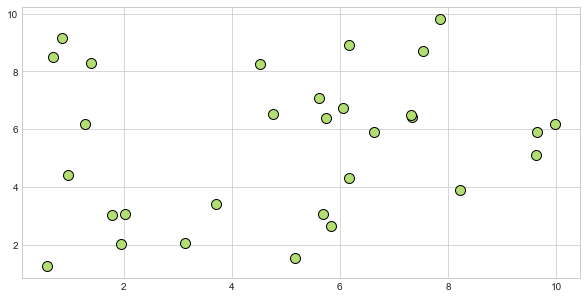

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, Y, c='#b3de72', edgecolor='k', s=100)
plt.show()

Our Data at the $0-th$  step / time instance looks like this.   


Lets generate the data for the rest of the time instances.   
We will change the coordinates of the points by a small margin at every step  
i.e add or subtract a small number for every time instance.

In [4]:
data = []

# our total no of time steps. This will be our total no of frames.
time_range = 200

xmax, xmin, ymax, ymin = 0, 0, 0, 0
for t in range(time_range):
    # append X and Y to data for each time_range instance
    data.append((X, Y))
    
    # change X and Y values by a small margin
    X = X + np.random.normal(0, 0.5, size=X.shape)
    Y = Y + np.random.normal(0, 0.5, size=Y.shape)
    
    # to set the ax limits
    xmax, xmin = max(xmax, X.max()), min(xmin, X.min())
    ymax, ymin = max(ymax, Y.max()), min(ymin, Y.min())

Lets plot few instances of our **data**

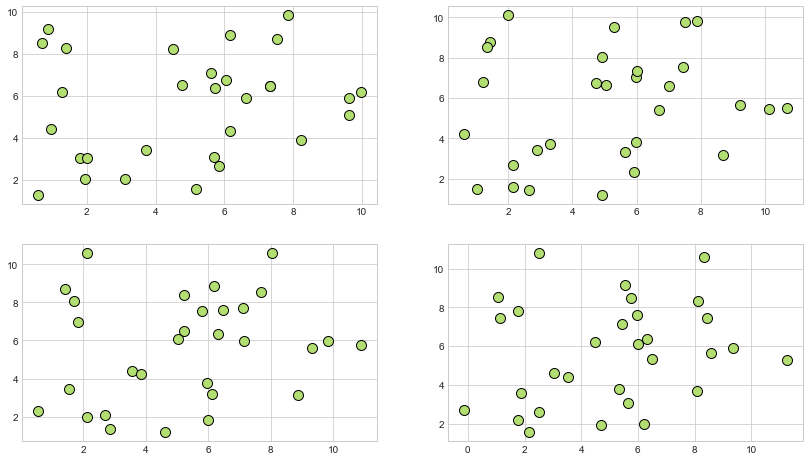

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, (X, Y) in zip(axes.reshape(-1), data[:4]):
    ax.scatter(X, Y, c='#b3de72', edgecolor='k', s=100)
plt.show()

As you can see very small amount of coordinate changes.

<div id="toc_3" data-value="Without Blitting"></div>

### Without Blitting
Now that we are done with the boring stuff lets **animate**.  

Without Blitting is basically method 1 from our last tutorial, here we redraw the plot for every instance / frame.

In [6]:
def update(i):
    # clear the plot for each frame
    ax.clear()
    # plot the 'i'-th time instance / step
    # See how we have to redraw all the properties such as color, size, etc even
    # though they remain constant.
    ax.scatter(data[i][0], data[i][1], c='#b3de72', edgecolor='k', s=100)
    
    # set the ax limits
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    

In [7]:

fig, ax = plt.subplots(figsize=(10, 5))
ani = animation.FuncAnimation(fig,          # the canvas we will use for the animation
                              update,      # the update function
                              frames=time_range,     # total no of frames
                              interval=75, # the delay between each frame
                              blit=False   # So we don't have to return the pathcollection object
                             )
plt.close()

In [8]:
HTML(ani.to_html5_video())

TADA !!, that's pretty much *our Without blitting example*

<div id="toc_4" data-value="With Blitting"></div>

### With Blitting
Now lets go through our method 2. In this process we will create the plot once and only update  
those attributes which are changing in every frame.  

Lets try something new as well ! We will change the point colors based on their coordinates.  
Something like this  
```
   20|
     |Red       Green
    5|
     |Orange    Lime
  -10|_______________
    -15     0     20
```

In [10]:
# Function to calculate the color based on the coordinates
colors = [''] * n

def get_colors(X, Y, colors):
    for i, (x, y) in enumerate(zip(X, Y)):
        if x < 0 and y < 5:
            colors[i] = '#fdbc6c' # ORANGE
        elif x >= 0 and y < 5:
            colors[i] = '#b3de72' # LIME
        elif x < 0 and y >= 5:
            colors[i] = '#e54d35' # RED
        elif x > 0 and y > 5:
            colors[i] = '#3faa5a' # GREEN
    return colors
get_colors(data[0][0], data[0][1], colors)[:5]

['#3faa5a', '#3faa5a', '#3faa5a', '#b3de72', '#3faa5a']

*Lets check the initial plot*

PathCollection object: <matplotlib.collections.PathCollection object at 0x000001DA66832B80>


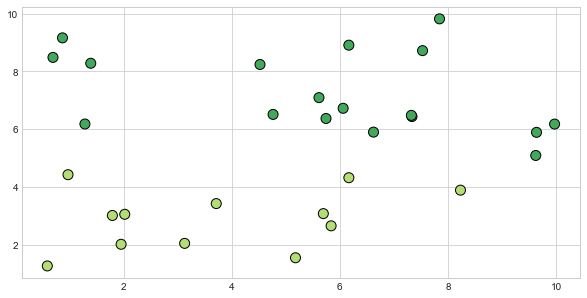

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
# The scatter function returns a PathCollection object
# Because we are going to modify the same plot
# The updates will be done only on X, Y and color
# edgecolor and size will remain constant

scatter = ax.scatter(data[0][0], data[0][1],
                     c=get_colors(data[0][0], data[0][1], colors),
                     edgecolors='k',
                     s=100)
print('PathCollection object:', scatter)
plt.show()

**To update X and Y**, we will use the function
> set_offsets()  

**To update the colors**
> set_facecolors()


In [12]:
def update(i):
    # Note how we don't clear the axis for each frame, just change what we need to
    # plot upto 'i'
    # NOTE THE FUNCTIONS USED TO UPDATE THE X, Y and color
    scatter.set_offsets(np.vstack((data[i][0], data[i][1])).T)
    scatter.set_facecolors(
        get_colors(data[i][0], data[i][1], colors)
    )
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))    
    # we need to return 'scatter' as a list / sequence in this method
    return scatter,

In [13]:
ani = animation.FuncAnimation(fig,          # the canvas we will use for the animation
                              update,      # the update function
                              frames=time_range,     # total no of frames
                              interval=75, # the delay between each frame
                              blit=True,  # blit is set true because we return some objects
                             )            

In [14]:
HTML(ani.to_html5_video())

<div id="toc_5" data-value="Summary"></div>

### Summary
Creating animations with blitting can be considerably faster, unfortunately it is quite a hassle to update  
all the properties of the scatterplot, such as markers, edgecolors, etc.The matplotlib documentations are not  
very friendly either. So feel free to do it without blitting. Adding annotations, multiple plots, legends, etc  
will be much easier as well. That's it for today, see ya next time !